In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

dt = pd.read_csv("C:/Users/WTA/Desktop/target/dof_data1.csv")
dt.head(-5)

dt1 = dt[['y','contrast']]
print(dt1)
dt2 = dt[['y_new','contrast new']][:342]
print(dt2)

       y   contrast
0    311  12.780120
1    312  14.728630
2    313  17.157040
3    314   9.714885
4    315   8.496620
..   ...        ...
363  674   6.963338
364  675   7.536793
365  676  10.697100
366  677   4.271496
367  678   6.700240

[368 rows x 2 columns]
     y_new  contrast new
0    351.0      20.74600
1    352.0      28.56797
2    353.0      25.15856
3    354.0      27.59494
4    355.0      28.81420
..     ...           ...
337  688.0      16.15542
338  689.0      17.63090
339  690.0      14.47835
340  691.0      19.77950
341  692.0      20.78010

[342 rows x 2 columns]


In [5]:
pixel_resolution1 = 8.24527
pixel_resolution2 = 7.47264
dt1['y']=dt1['y']*pixel_resolution1
dt2['y_new']=dt2['y_new']*pixel_resolution2
print(dt1['y'])

fitting1 = np.poly1d(np.polyfit(dt1['y'],dt1['contrast'],7))
line1 = np.linspace(min(dt1['y']),max(dt1['y']),400)
fitting2 = np.poly1d(np.polyfit(dt2['y_new'],dt2['contrast new'],5))
line2 = np.linspace(min(dt2['y_new']),max(dt2['y_new']),400)

0      2564.27897
1      2572.52424
2      2580.76951
3      2589.01478
4      2597.26005
          ...    
363    5557.31198
364    5565.55725
365    5573.80252
366    5582.04779
367    5590.29306
Name: y, Length: 368, dtype: float64


C:\Users\WTA\AppData\Local\Temp\ipykernel_2092\3220886190.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt1['y']=dt1['y']*pixel_resolution1


In [6]:
print(len(dt1['y']))
print(len(dt1['contrast']))
print(len(dt2['y_new']))
print(len(dt2['contrast new']))
print(max(dt1['contrast'])*0.8)
print(max(dt2['contrast new'])*0.8)

368
368
342
342
59.11016
60.396280000000004


In [7]:
font1 = {'family': 'Times New Roman',
      'color':  'darkblue',
      'weight': 'bold',
      'size': 14}
font2 = {'family': 'Times New Roman',
      'color':  'darkred',
      'weight': 'bold',
      'size': 14}
plt.rcParams['font.family'] = 'Times New Roman'

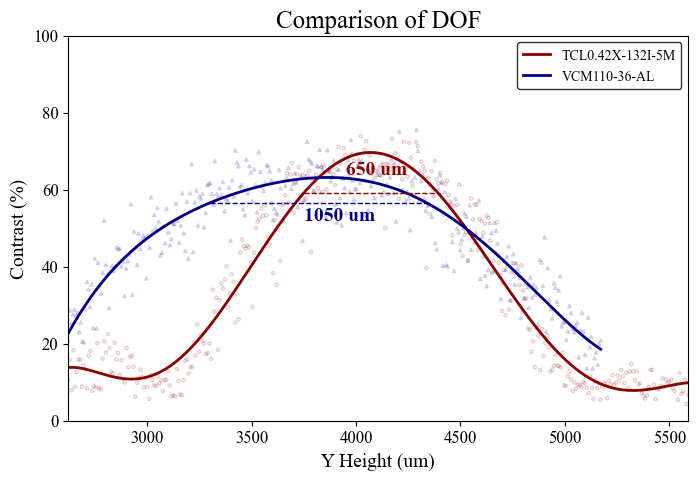

In [35]:
fig, ax = plt.subplots(1,1,figsize=(8,5))
ax.scatter(dt1['y'],dt1['contrast'],s=5,facecolors='none', edgecolors='darkred',alpha = 0.2)
ax.scatter(dt2['y_new'],dt2['contrast new'],s=5,facecolors='none', edgecolors='darkblue',alpha= 0.2,marker='^')

l1, = ax.plot(line1, fitting1(line1),'darkred',linewidth=2,label = 'Before')
l2, = ax.plot(line2, fitting2(line2),'darkblue',linewidth=2,label = 'After')
ax.hlines(max(dt1['contrast'])*0.8, 3750, 4400, color='darkred', linestyle='--', linewidth= 1)
ax.hlines((max(dt2['contrast new'])-5)*0.8, 3300, 4350, color='darkblue', linestyle='--', linewidth= 1)

ax.text(3750, 52, '1050 um',fontdict=font1)
ax.text(3950, 64, '650 um',fontdict=font2)

ax.set_xlabel('Y Height (um)',fontsize = 14)
ax.set_ylabel('Contrast (%)',fontsize = 14)
ax.set_xlim(min(dt2['y_new']),max(dt1['y']))
ax.set_ylim(0,100)

ax.set_title('Comparison of DOF',fontsize = 18)
ax.legend([l1,l2],['TCL0.42X-132I-5M','VCM110-36-AL'],edgecolor = 'black')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [ ]:
# 340px
# 620px